In [65]:
#library import
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Perceptron, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score


import warnings
warnings.filterwarnings('ignore')

In [190]:
df = pd.read_csv('diabetes.csv') # load data

In [4]:
df.head(10) #show the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
df.shape  # shape check 

(768, 9)

In [6]:
df.dtypes  # types check

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.duplicated().sum()  #  duplicate check

0

In [8]:
df.isna().sum()  #  nan value check 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

need to draw the distribution of each parameter and look at the dividing capacity 

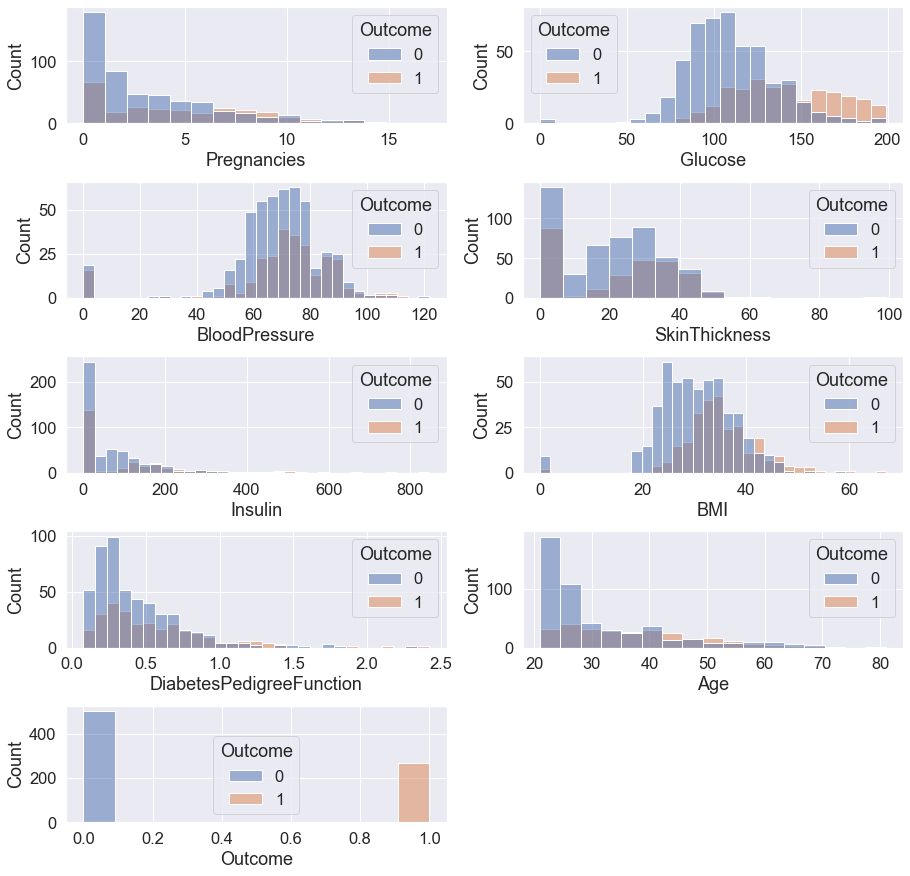

In [9]:
col_names = [cname for cname in df.columns]
sns.set(font_scale = 1.5)
rcParams['figure.figsize'] = 15,15
plt.subplots_adjust(hspace=0.5)
for number in range(len(col_names)):
    plt.subplot(5,2,number+1)
    sns.histplot(data=df, x=col_names[number], hue="Outcome")

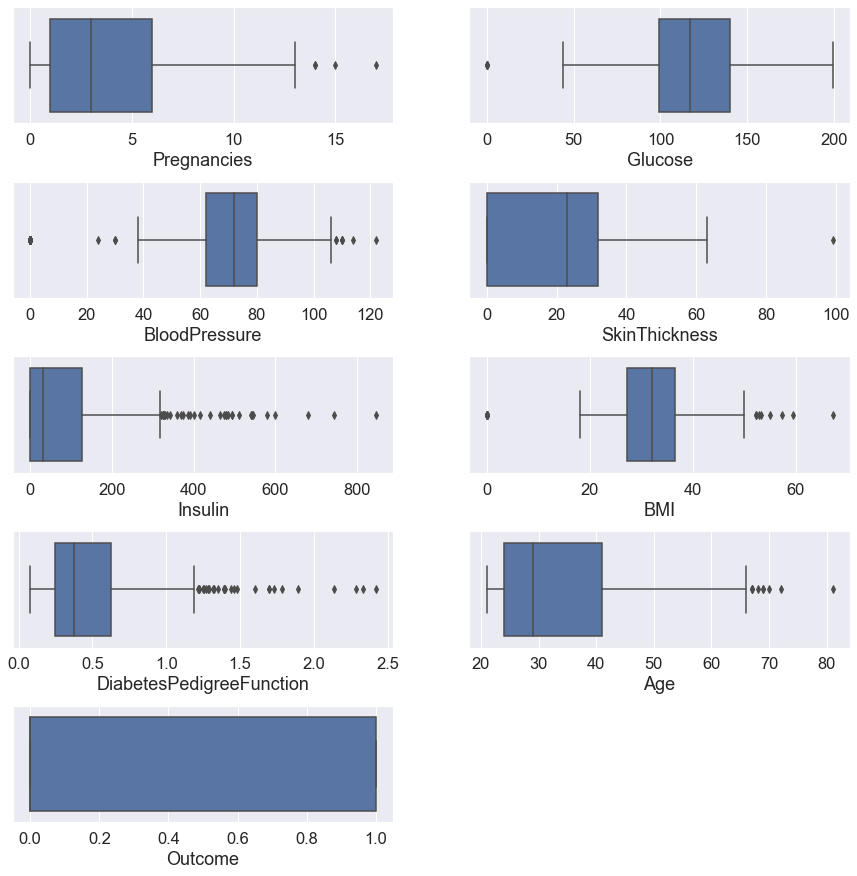

In [10]:
plt.subplots_adjust(hspace=0.5)
for number in range(len(col_names)):
    plt.subplot(5,2,number+1)
    sns.boxplot(data=df, x=col_names[number], hue="Outcome")

draw a covariance matrix and see how non-collinear the data are

<AxesSubplot:>

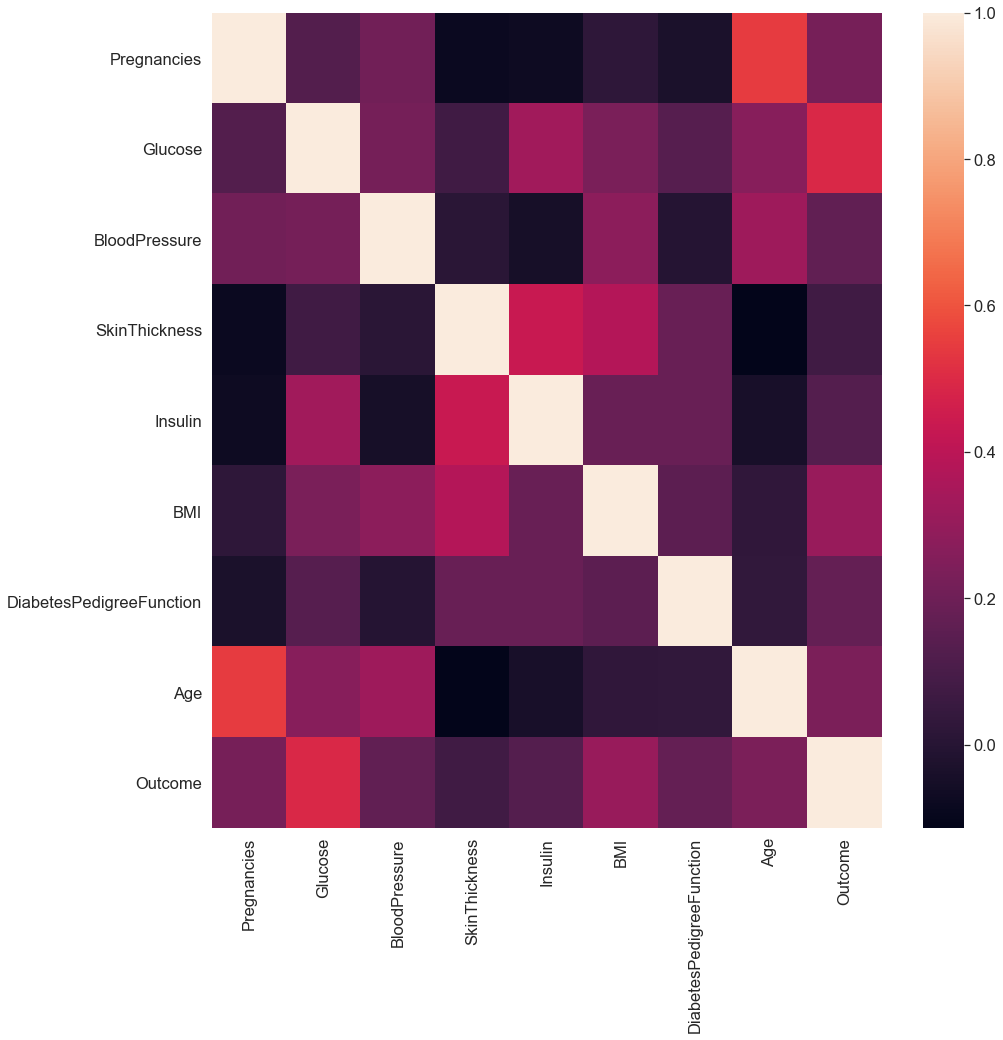

In [177]:
sns.heatmap(df.corr())

In [11]:
df.describe()  #  Let's check the statistics 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


we see that there are cases where some parameters have zero values
This should not be the case

First, we will not process these cases and will not create new features  

In [66]:
norm_df = MinMaxScaler().fit_transform(df)  #  normalize data

In [13]:
x_train, x_test, y_train, y_test =  train_test_split(norm_df[:,:-1], norm_df[:,-1], test_size=0.33, random_state=42)  #train test split

In [14]:
norm_df[:,:-1].shape, norm_df[:,-1:].shape

((768, 8), (768, 1))

In [15]:
model = LogisticRegression()  # init ml model

In [16]:
model.fit(x_train, y_train)  # train model

LogisticRegression()

In [17]:
accuracy_score(y_test, model.predict(x_test))  # test model and metric accuracy check

0.7480314960629921

let's look at the confusion matrix, precision and recall

<AxesSubplot:>

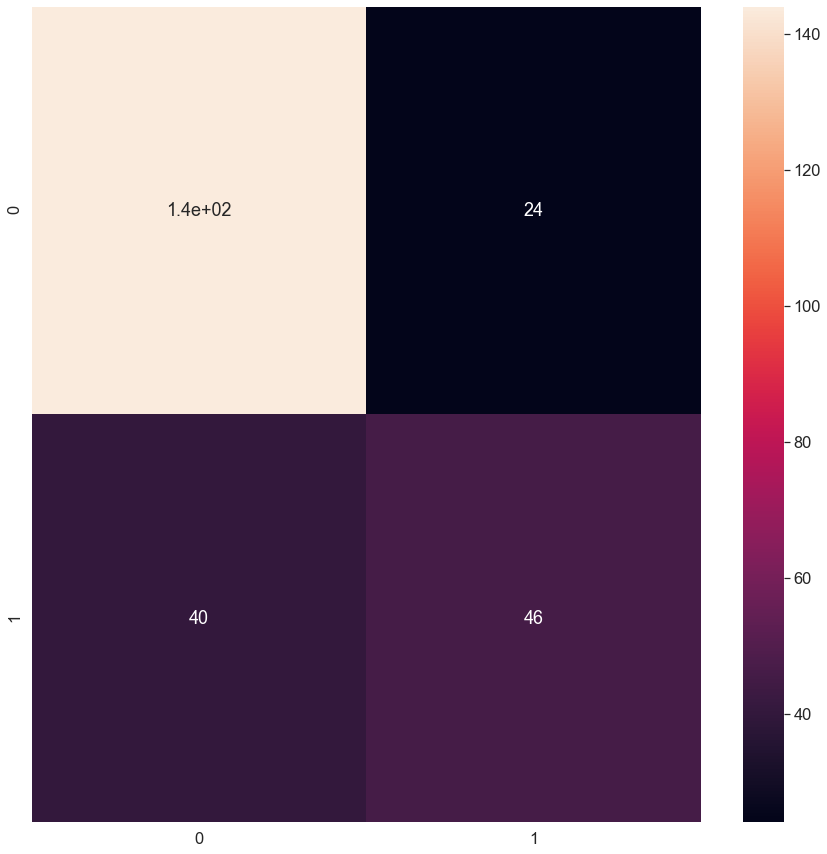

In [18]:
sns.heatmap(confusion_matrix(y_test, model.predict(x_test)), annot=True)

In [19]:
precision_score(y_test, model.predict(x_test))

0.6571428571428571

In [20]:
recall_score(y_test, model.predict(x_test))

0.5348837209302325

Let's create several classification models and train each by looking at the accuracy

In [68]:
models = {
    'LogisticRegression': LogisticRegression(),
    'RidgeClassifier': RidgeClassifier(),
    'Perceptron': Perceptron(),
    'SGDClassifier': SGDClassifier(),
    'LinearSVC': LinearSVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'MLPClassifier': MLPClassifier(),
    'XGBClassifier': XGBClassifier()
}

In [94]:
acc = []
pre = []
rec = []
name_model = []
for name, model in models.items():
    cv = KFold(n_splits=15)
    accuracy = cross_val_score(model, x_train, y_train, cv=cv, scoring="accuracy")
    precision = cross_val_score(model, x_train, y_train, cv=cv, scoring="precision")
    recall = cross_val_score(model, x_train, y_train, cv=cv, scoring="recall")
    acc.append(accuracy)
    pre.append(precision)
    rec.append(recall)
    name_model.append(name)
    print(f"{name} - mean_accuracy {round(accuracy.mean(), 4)} mean_precision {round(precision.mean(), 4)} mean_recall {round(recall.mean(), 4)}")

LogisticRegression - mean_accuracy 0.7602 mean_precision 0.7284 mean_recall 0.5138
RidgeClassifier - mean_accuracy 0.7798 mean_precision 0.7467 mean_recall 0.5693
Perceptron - mean_accuracy 0.7158 mean_precision 0.6546 mean_recall 0.5543
SGDClassifier - mean_accuracy 0.7311 mean_precision 0.6417 mean_recall 0.5894
LinearSVC - mean_accuracy 0.7798 mean_precision 0.7377 mean_recall 0.5798
DecisionTreeClassifier - mean_accuracy 0.7232 mean_precision 0.6495 mean_recall 0.6258
RandomForestClassifier - mean_accuracy 0.7721 mean_precision 0.6924 mean_recall 0.611
GradientBoostingClassifier - mean_accuracy 0.7721 mean_precision 0.6885 mean_recall 0.6449
MLPClassifier - mean_accuracy 0.7681 mean_precision 0.7092 mean_recall 0.5746
XGBClassifier - mean_accuracy 0.7526 mean_precision 0.6584 mean_recall 0.629


Pick up hyperparameters for xgboost

In [48]:
xgb_model = XGBClassifier()
params = {
    'learning_rate': [1e-5, 1e-4, 1e-5],
    'max_depth':[3, 5, 8, 10, 13, 15],
    'n_estimators': [10, 100, 500, 1000, 1500],
}
xgb_cv_model  = GridSearchCV(xgb_model, params, n_jobs = -1, verbose = 2).fit(x_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


In [49]:
xgb_cv_model.best_params_

{'learning_rate': 0.0001, 'max_depth': 13, 'n_estimators': 1000}

In [51]:
accuracy_score(y_test, xgb_cv_model.predict(x_test))

0.7244094488188977

In [52]:
precision_score(y_test, xgb_cv_model.predict(x_test))

0.5930232558139535

In [53]:
recall_score(y_test, xgb_cv_model.predict(x_test))

0.5930232558139535

Text(0, 0.5, 'Accuracy')

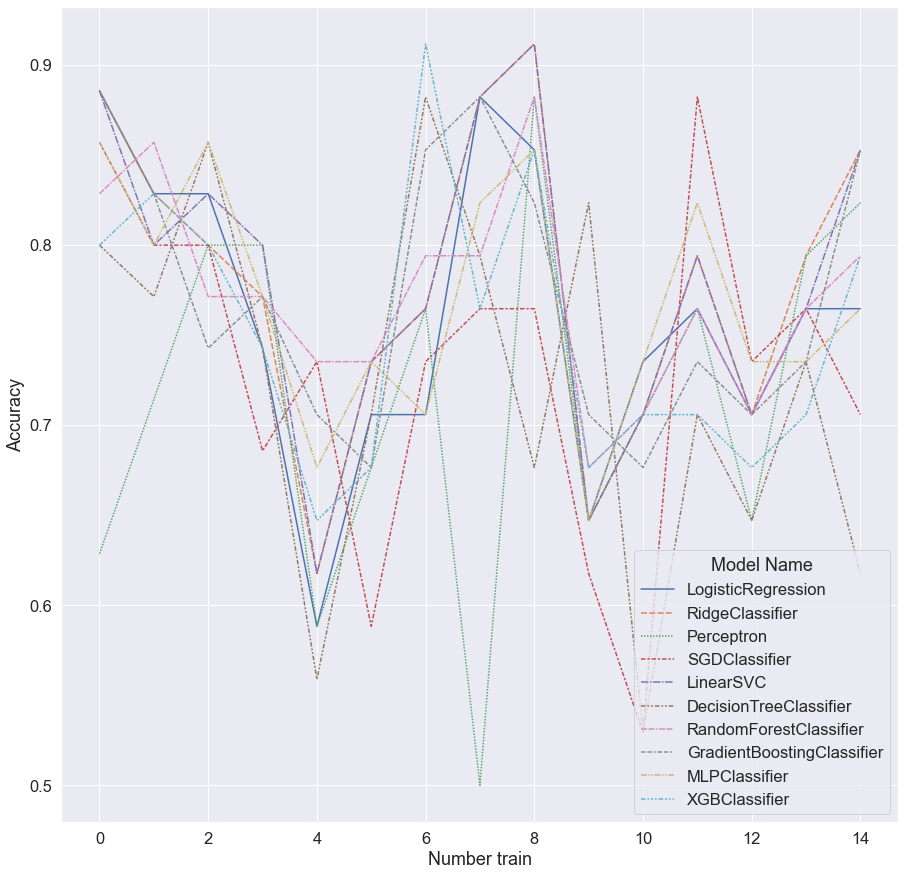

In [102]:
sns.lineplot(data=acc, )
plt.legend(labels=name_model, title = 'Model Name')
plt.xlabel('Number train')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Precision')

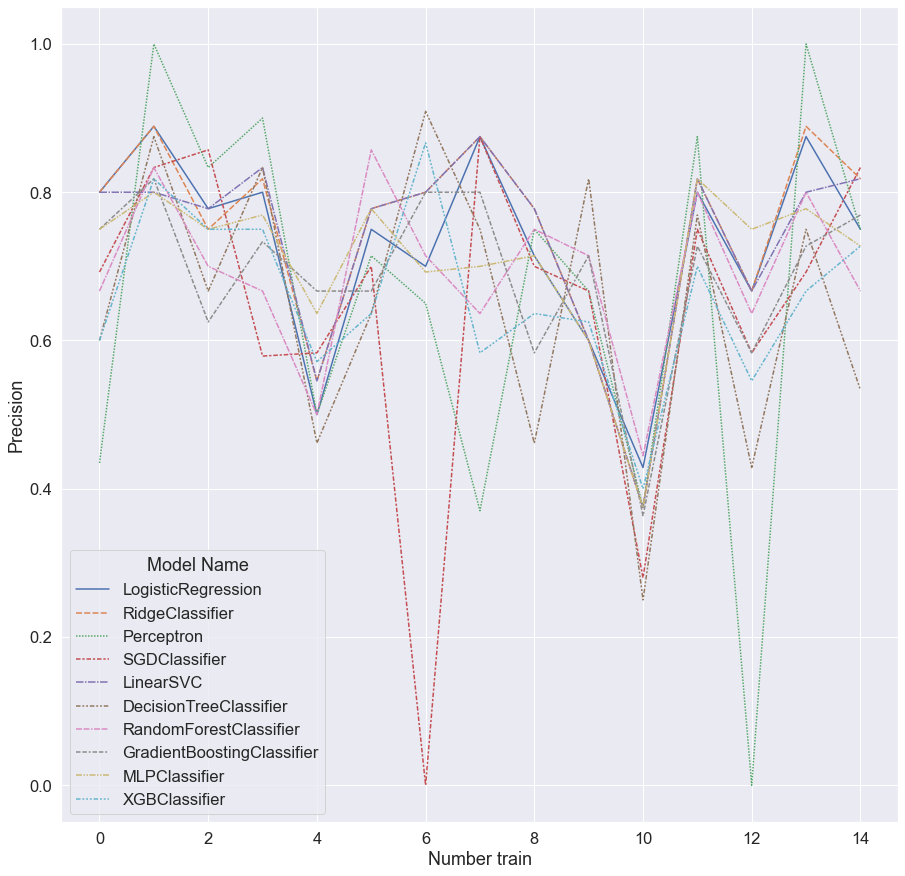

In [101]:
sns.lineplot(data=pre)
plt.legend(labels=name_model, title = 'Model Name')
plt.xlabel('Number train')
plt.ylabel('Precision')

Text(0, 0.5, 'Recall')

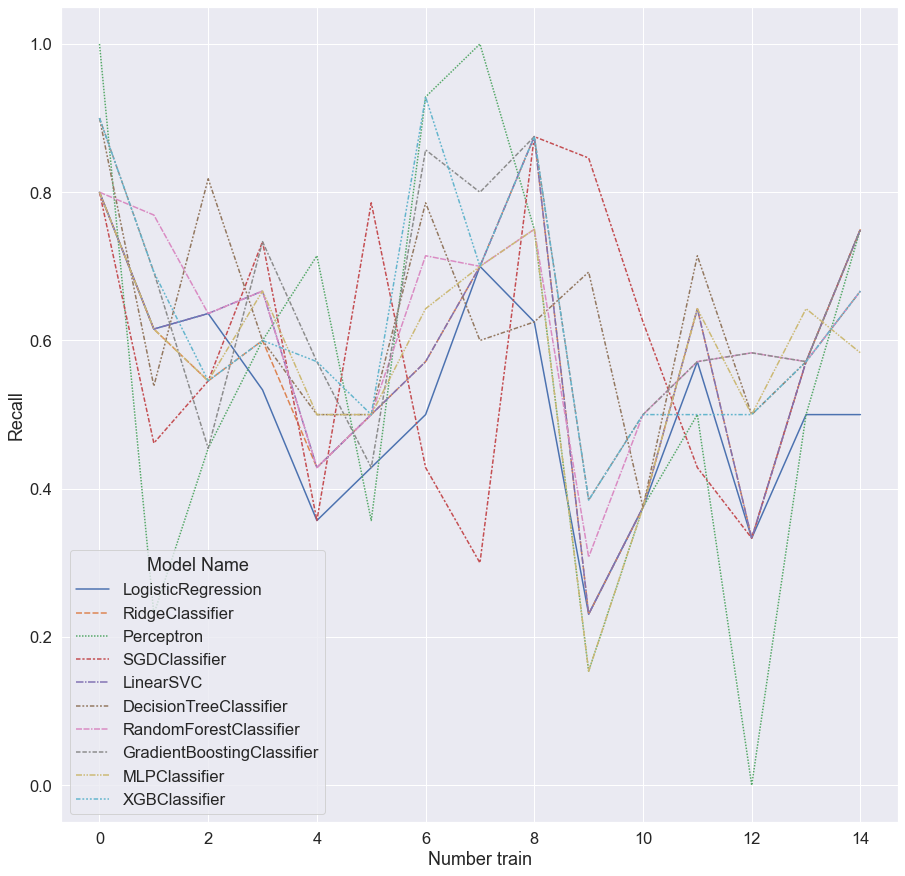

In [103]:
sns.lineplot(data=rec)
plt.legend(labels=name_model, title = 'Model Name')
plt.xlabel('Number train')
plt.ylabel('Recall')

According to these graphs you can see that there is no significant difference between the choice of model, at the same time we have a number of leaders on the average accuracy of the metric
The quality metric is chosen depending on the task
In our case, the recall metric is a higher priority, because it is better to mistakenly identify a patient with diabetes and send him or her for additional testing than to miss a patient with diabetes

 - Best accuracy - RidgeClassifier LinearSVC (0.7798)
 - Best precision - RidgeClassifier (0.7467)
 - Best recall - GradientBoostingClassifier (0.6449)

Let's dig deeper into the data and try to come up with new parameters to improve the model

In [105]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The graph shows the number of children in the patient
17 is a lot, and it can be 

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

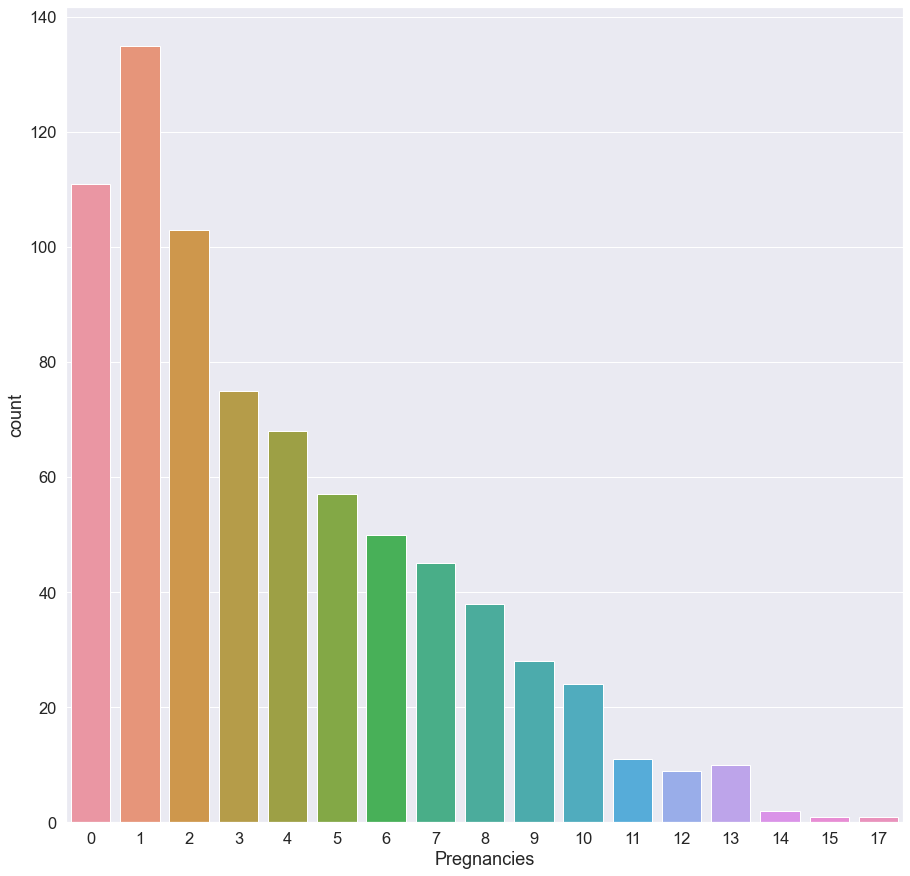

In [106]:
sns.countplot(df['Pregnancies'])

<AxesSubplot:xlabel='Glucose'>

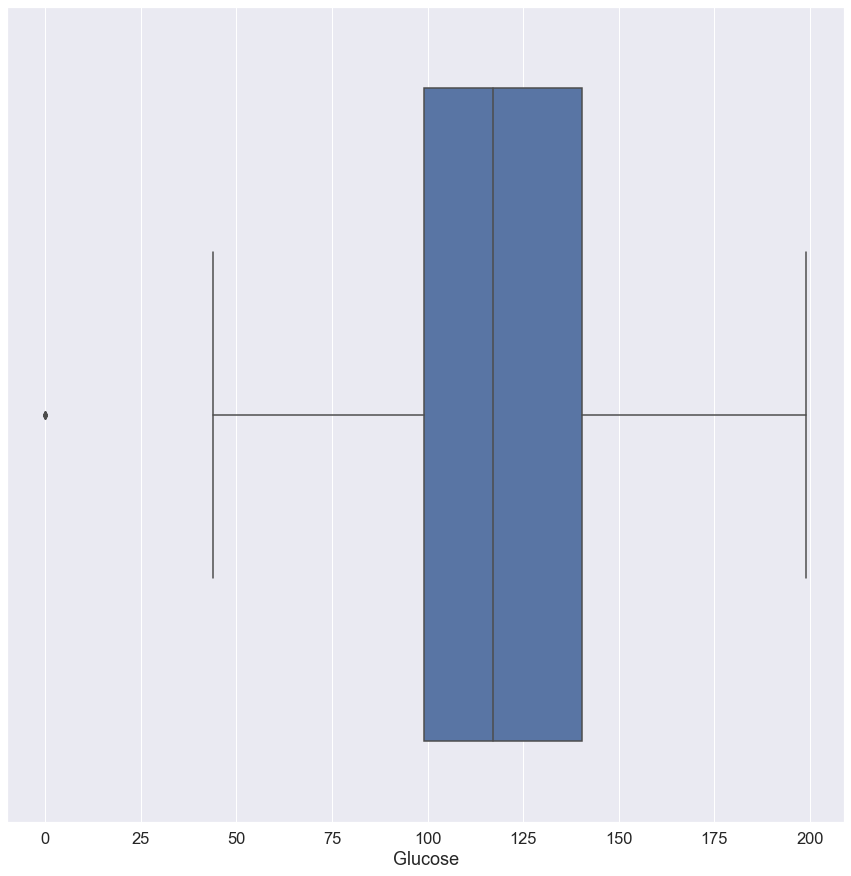

In [137]:
sns.boxplot(df['Glucose'])

we see that there are some about zero values in the data and this is not correct

<AxesSubplot:xlabel='Glucose'>

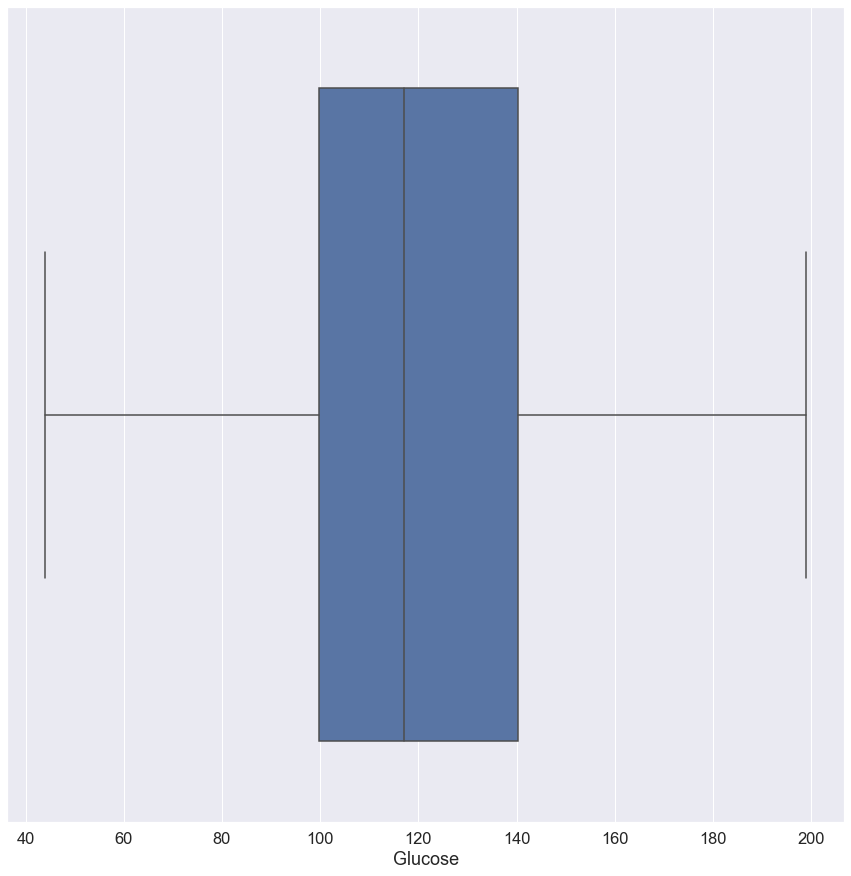

In [145]:
sns.boxplot(df['Glucose'])

It's better that way.

<AxesSubplot:xlabel='BloodPressure'>

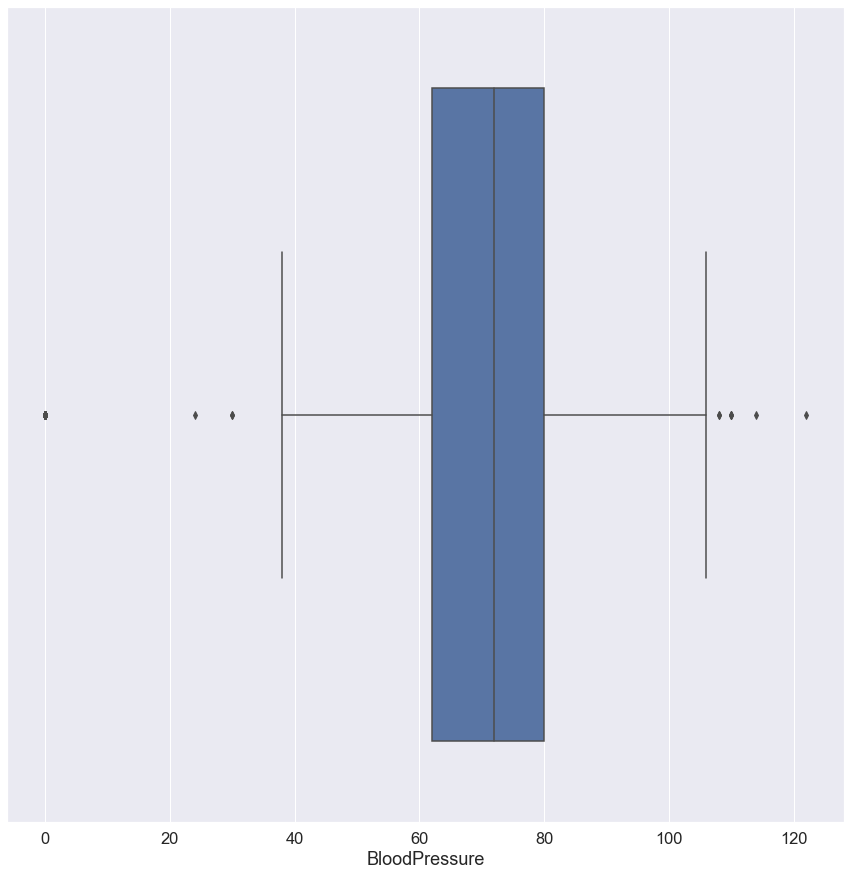

In [147]:
sns.boxplot(df['BloodPressure'])

There are still outliers, but I can't judge these values as invalid (BloodPressure)

<AxesSubplot:xlabel='BloodPressure'>

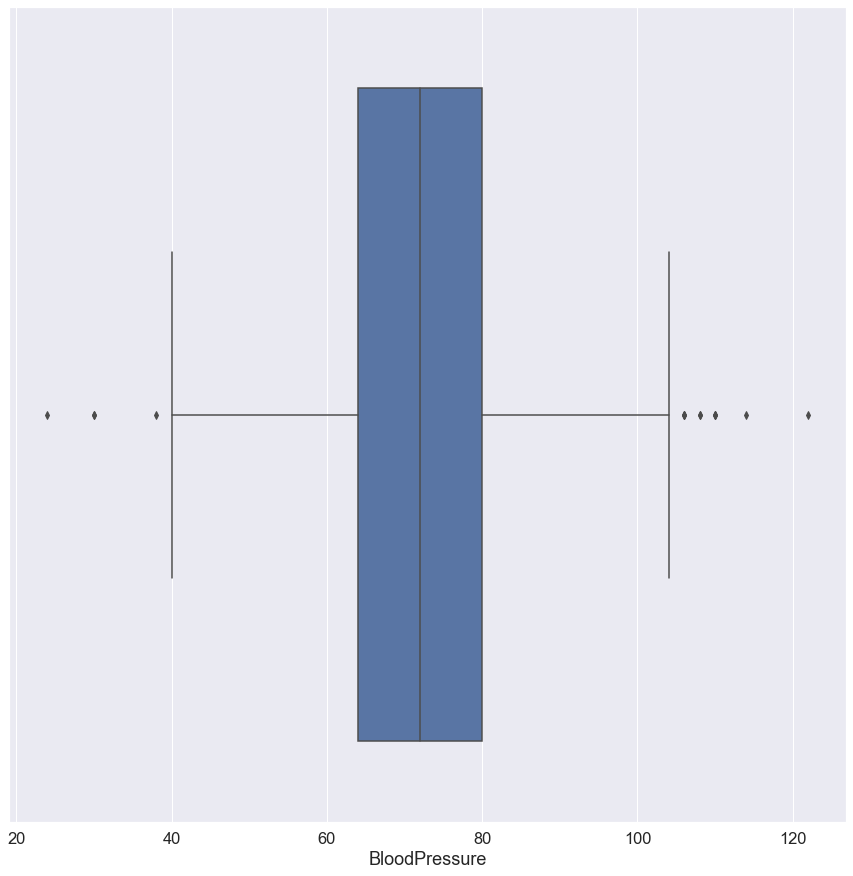

In [150]:
sns.boxplot(df['BloodPressure'])

This parameter is very strange and not suitable for use, because the values in it are too unrealistic

<AxesSubplot:xlabel='SkinThickness'>

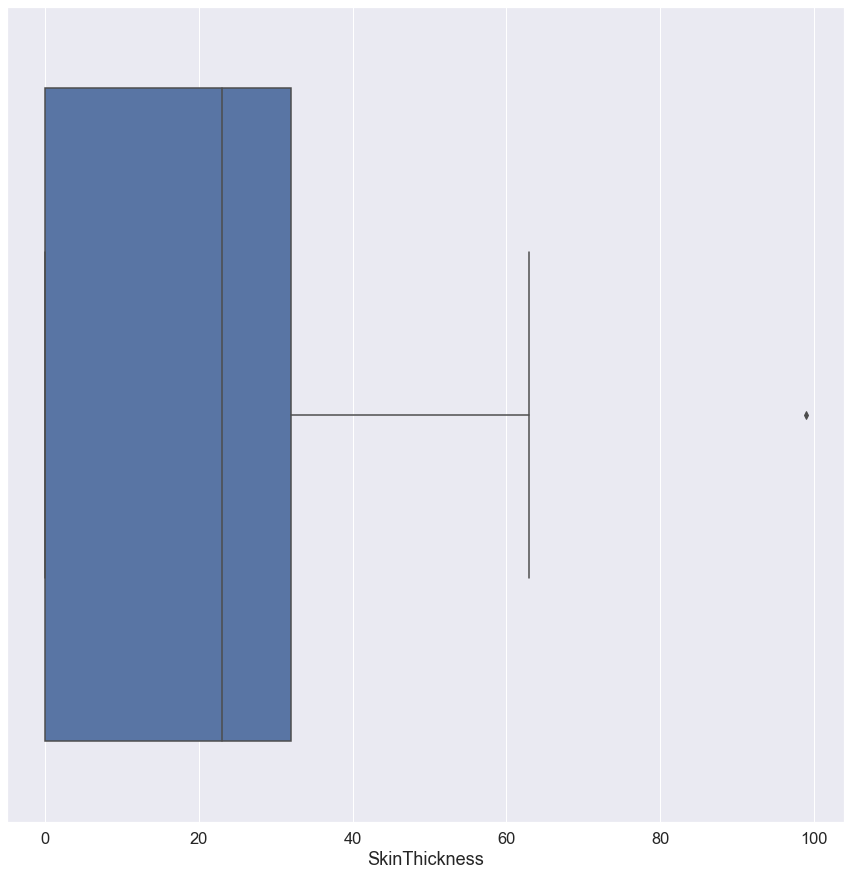

In [152]:
sns.boxplot(df['SkinThickness'])

This feature is also strangely distributed to me at that I do not know the deep application part and will not violate the laws of nature

<AxesSubplot:xlabel='Insulin'>

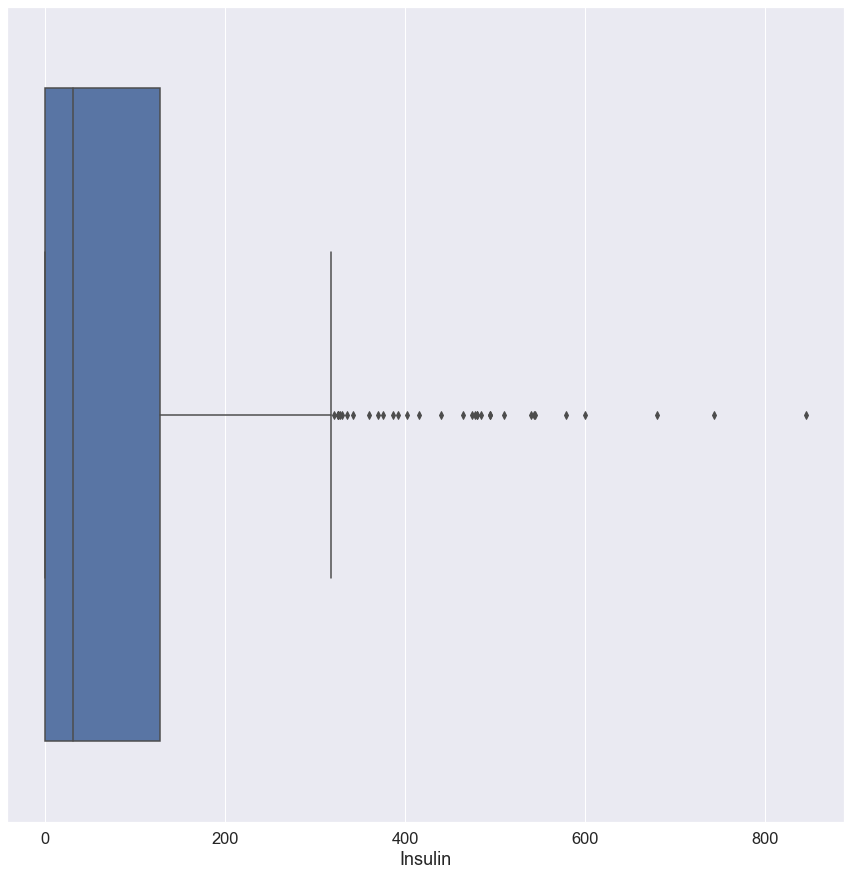

In [153]:
sns.boxplot(df['Insulin'])

On the distribution of all parameters from the target, we have seen that this variable at large values helps us distinguish between two classes

<AxesSubplot:xlabel='BMI'>

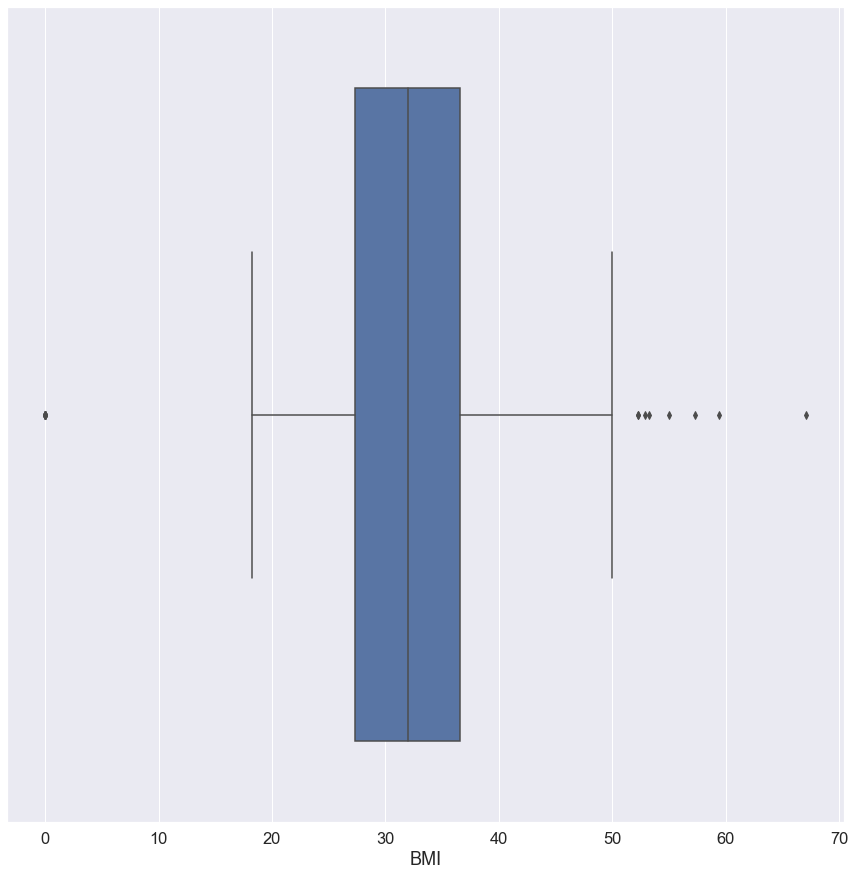

In [154]:
sns.boxplot(df['BMI'])

<AxesSubplot:xlabel='BMI'>

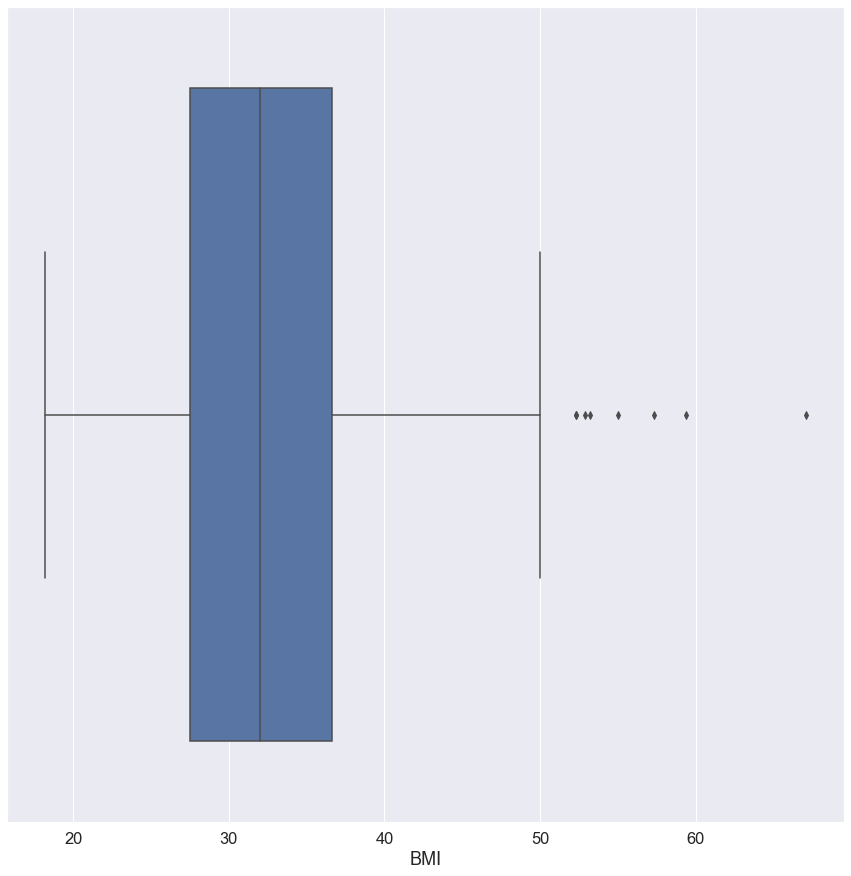

In [156]:
sns.boxplot(df['BMI'])

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

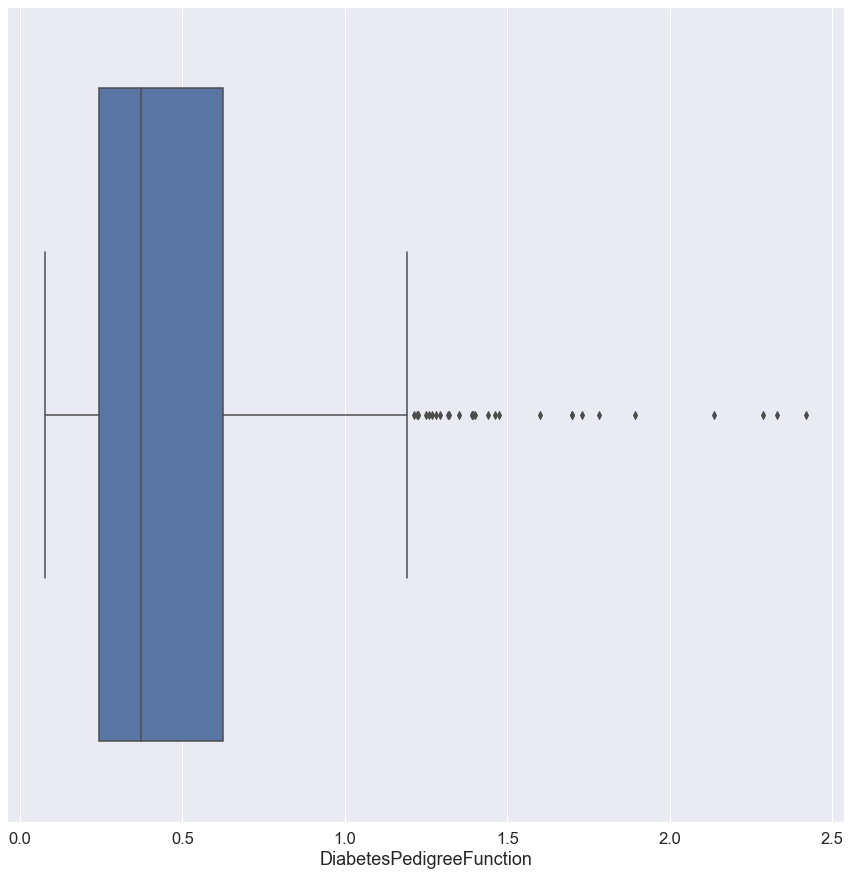

In [157]:
sns.boxplot(df['DiabetesPedigreeFunction'])

<AxesSubplot:xlabel='Age', ylabel='count'>

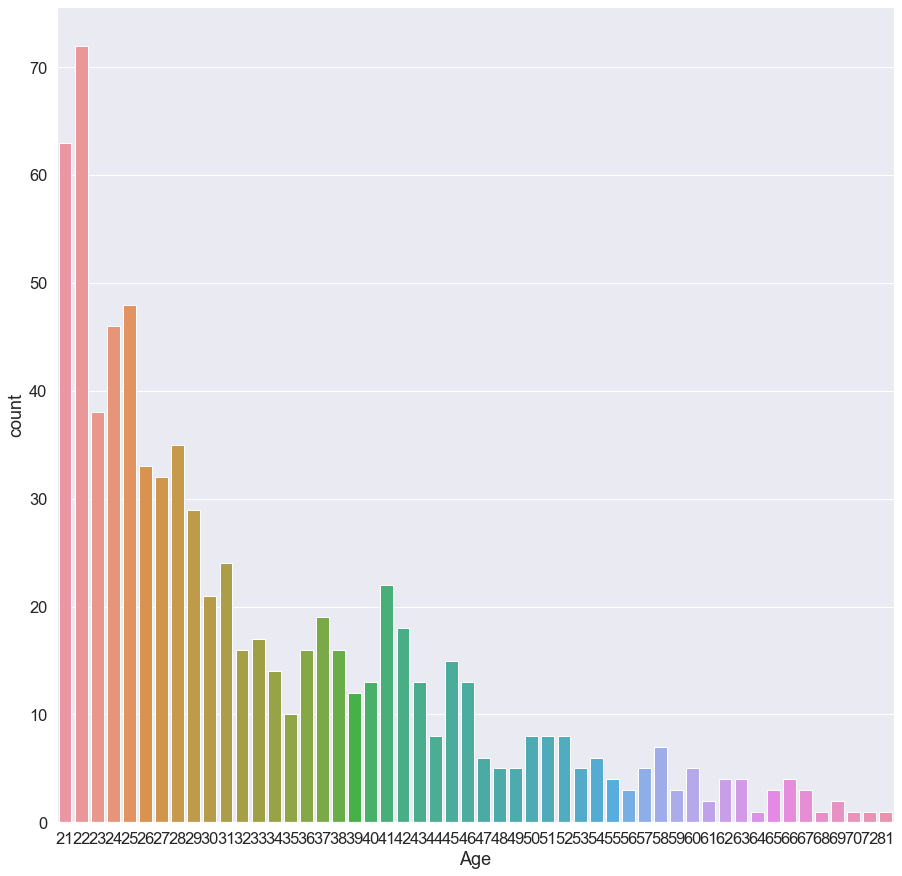

In [158]:
sns.countplot(df['Age'])

In [192]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)

In [193]:
def median_target(var):   
    
    temp = df[df[var].notnull()]
    
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    
    return temp

In [194]:
columns = df.columns

columns = columns.drop("Outcome")

for col in columns:
    
    df.loc[(df['Outcome'] == 0 ) & (df[col].isnull()), col] = median_target(col)[col][0]
    df.loc[(df['Outcome'] == 1 ) & (df[col].isnull()), col] = median_target(col)[col][1]

In [195]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.389323,29.089844,141.753906,32.434635,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.106039,8.890820,89.100847,6.880498,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


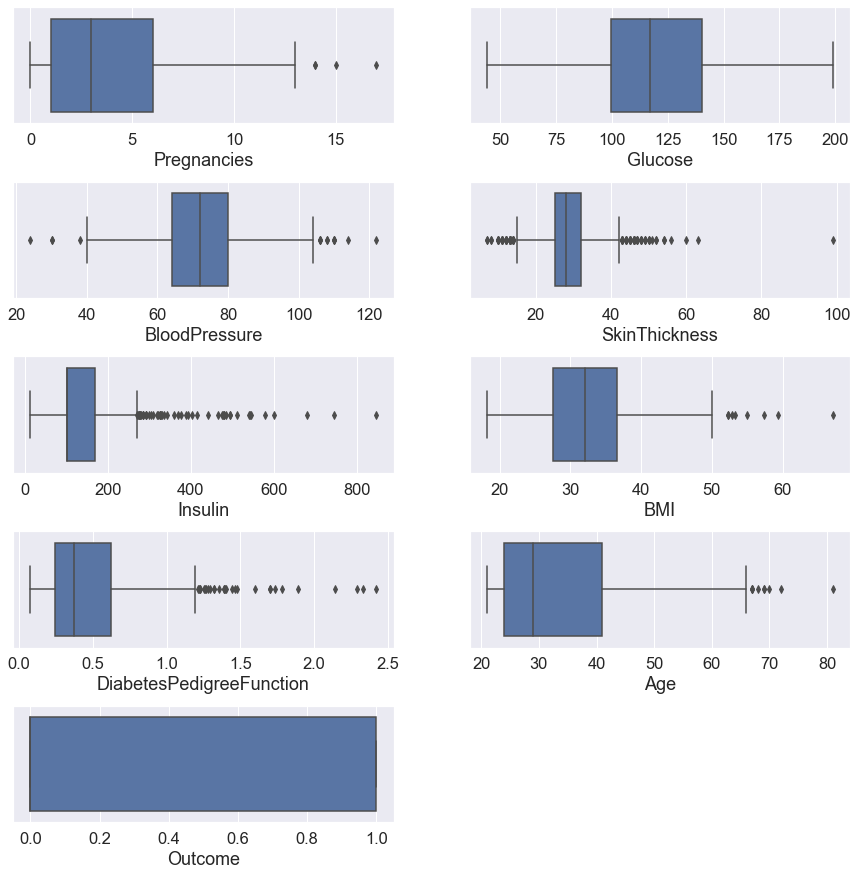

In [196]:
plt.subplots_adjust(hspace=0.5)
for number in range(len(col_names)):
    plt.subplot(5,2,number+1)
    sns.boxplot(data=df, x=col_names[number], hue="Outcome")

ValueError: num must be 1 <= num <= 10, not 11

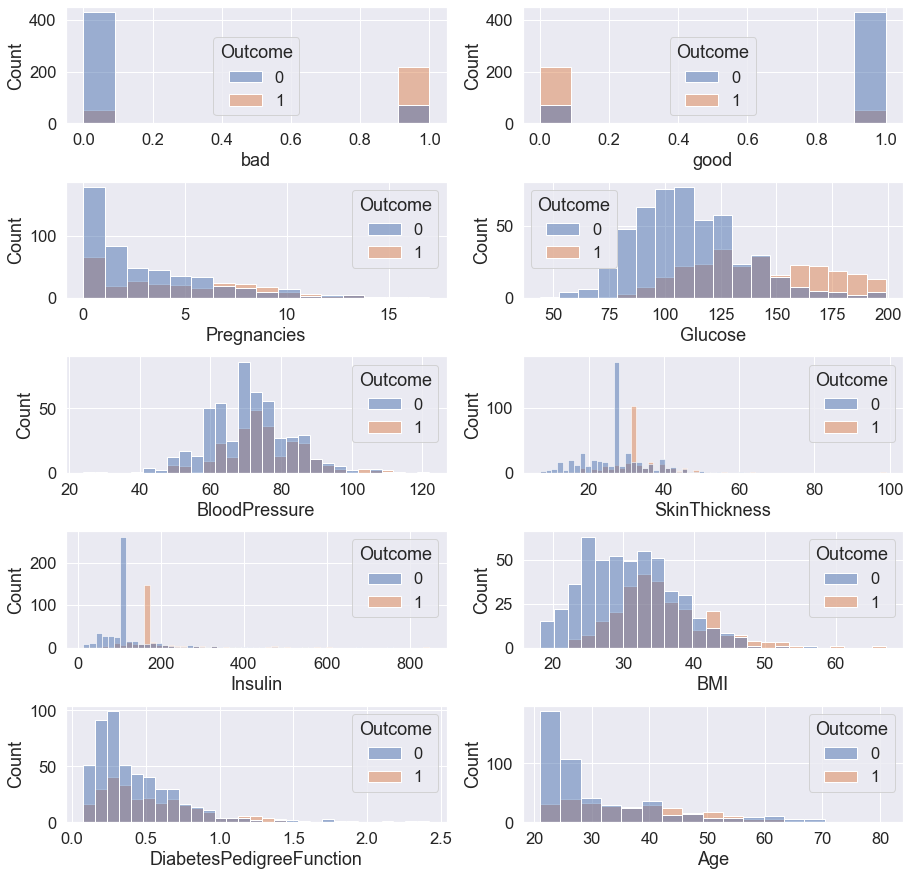

In [270]:
col_names = [cname for cname in df.columns]
sns.set(font_scale = 1.5)
rcParams['figure.figsize'] = 15,15
plt.subplots_adjust(hspace=0.5)
for number in range(len(col_names)):
    plt.subplot(5,2,number+1)
    sns.histplot(data=df, x=col_names[number], hue="Outcome")

It's better than it was.

I think insulin should affect diabetes so let's try to extract information from it

Since I am not good in the subject area, I managed to find some metric for insulin on the Internet

- Two hours after drinking the glucose solution, a normal blood glucose level is lower than 155 mg/dL (8.6 mmol/L).

Let's create a new feature
good or bad 

In [204]:
df['cat_insuline'] =  df['Insulin'].apply(lambda x: 'good' if x < 155 else 'bad')

<AxesSubplot:xlabel='cat_insuline', ylabel='count'>

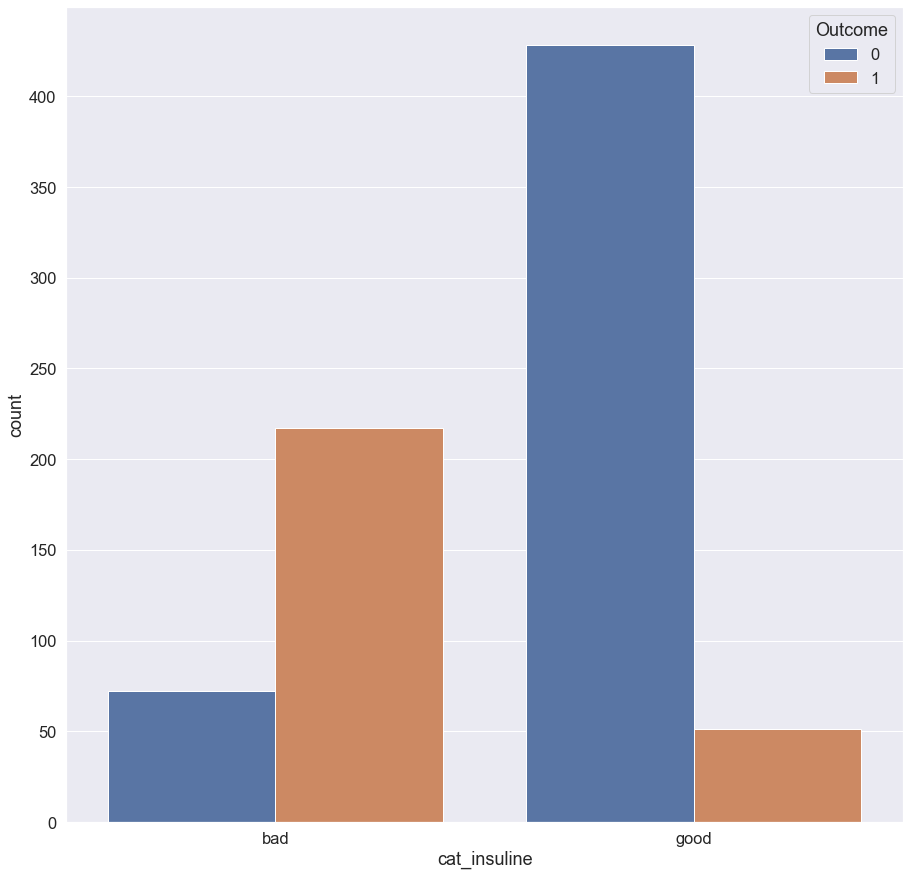

In [208]:
sns.countplot(df['cat_insuline'], hue='Outcome', data=df)

I think this is a good feature

In [212]:
df = pd.concat([pd.get_dummies(df['cat_insuline']), df], axis=1).drop(columns=['cat_insuline'])

In [213]:
df.describe()

,bad,good,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.376302,0.623698,3.845052,121.677083,72.389323,29.089844,141.753906,32.434635,0.471876,33.240885,0.348958
std,0.484773,0.484773,3.369578,30.464161,12.106039,8.890820,89.100847,6.880498,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,0.000000,0.000000,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,0.000000,1.000000,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000
75%,1.000000,1.000000,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,1.000000,1.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Now let's try to teach the model

In [214]:
norm_df = MinMaxScaler().fit_transform(df)  #  normalize data

In [215]:
x_train, x_test, y_train, y_test =  train_test_split(norm_df[:,:-1], norm_df[:,-1], test_size=0.33, random_state=42)  #train test split

In [216]:
acc = []
pre = []
rec = []
name_model = []
for name, model in models.items():
    cv = KFold(n_splits=15)
    accuracy = cross_val_score(model, x_train, y_train, cv=cv, scoring="accuracy")
    precision = cross_val_score(model, x_train, y_train, cv=cv, scoring="precision")
    recall = cross_val_score(model, x_train, y_train, cv=cv, scoring="recall")
    acc.append(accuracy)
    pre.append(precision)
    rec.append(recall)
    name_model.append(name)
    print(f"{name} - mean_accuracy {round(accuracy.mean(), 4)} mean_precision {round(precision.mean(), 4)} mean_recall {round(recall.mean(), 4)}")

LogisticRegression - mean_accuracy 0.8579 mean_precision 0.7922 mean_recall 0.8244
RidgeClassifier - mean_accuracy 0.8501 mean_precision 0.7819 mean_recall 0.8148
Perceptron - mean_accuracy 0.8169 mean_precision 0.7454 mean_recall 0.8537
SGDClassifier - mean_accuracy 0.8233 mean_precision 0.7544 mean_recall 0.6919
LinearSVC - mean_accuracy 0.854 mean_precision 0.7861 mean_recall 0.8204
DecisionTreeClassifier - mean_accuracy 0.8692 mean_precision 0.8274 mean_recall 0.7425
RandomForestClassifier - mean_accuracy 0.8872 mean_precision 0.848 mean_recall 0.8409
GradientBoostingClassifier - mean_accuracy 0.8908 mean_precision 0.8664 mean_recall 0.8428
MLPClassifier - mean_accuracy 0.8638 mean_precision 0.8186 mean_recall 0.7794
XGBClassifier - mean_accuracy 0.9005 mean_precision 0.8667 mean_recall 0.8575


Well.
It is easy to see that our conversion in the data helped increase the accuracy of the models and raise the recall 

Text(0, 0.5, 'Accuracy')

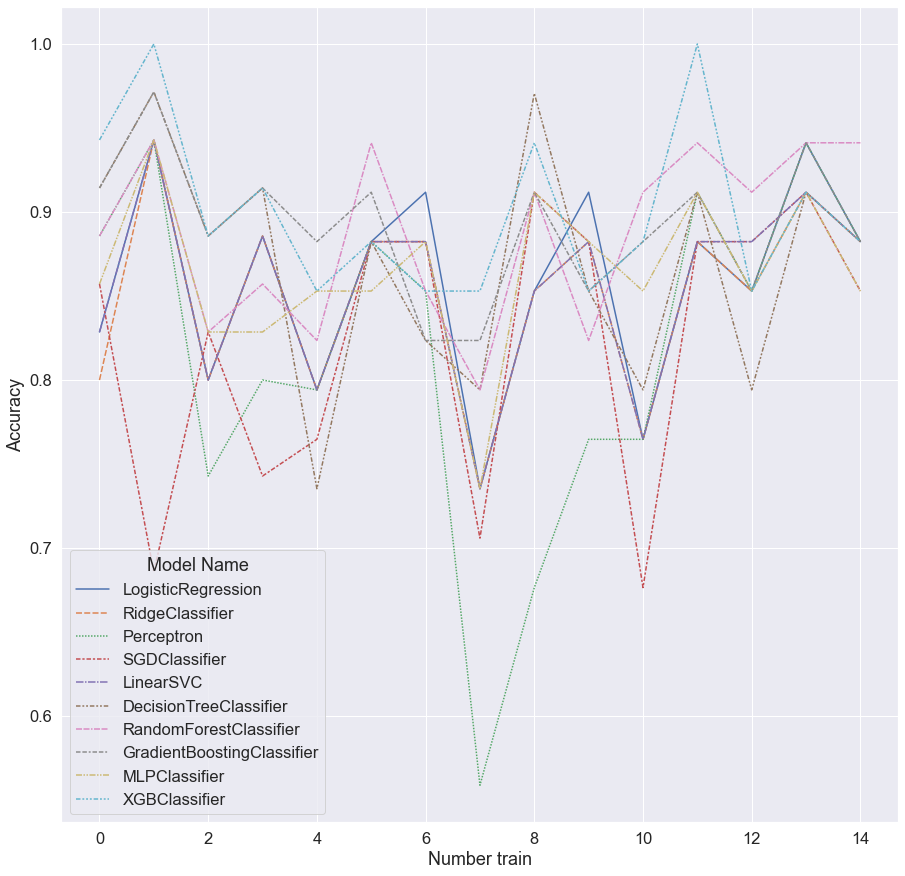

In [231]:
sns.lineplot(data=acc, )
plt.legend(labels=name_model, title = 'Model Name')
plt.xlabel('Number train')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Precision')

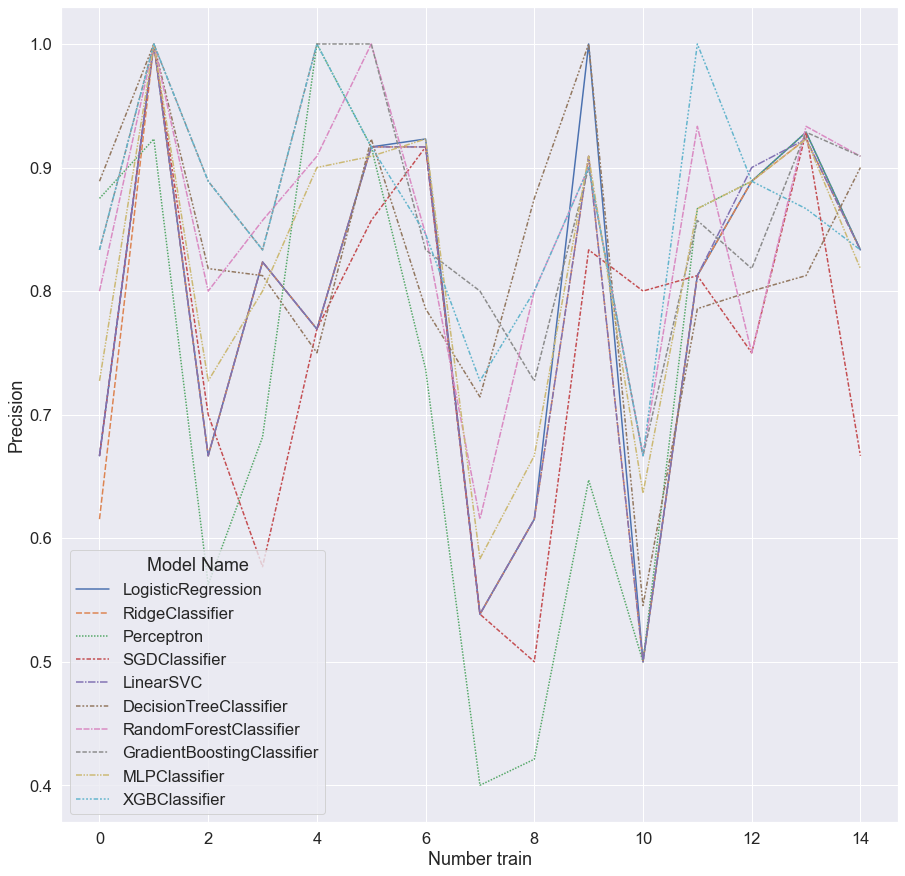

In [232]:
sns.lineplot(data=pre)
plt.legend(labels=name_model, title = 'Model Name')
plt.xlabel('Number train')
plt.ylabel('Precision')

Text(0, 0.5, 'Recall')

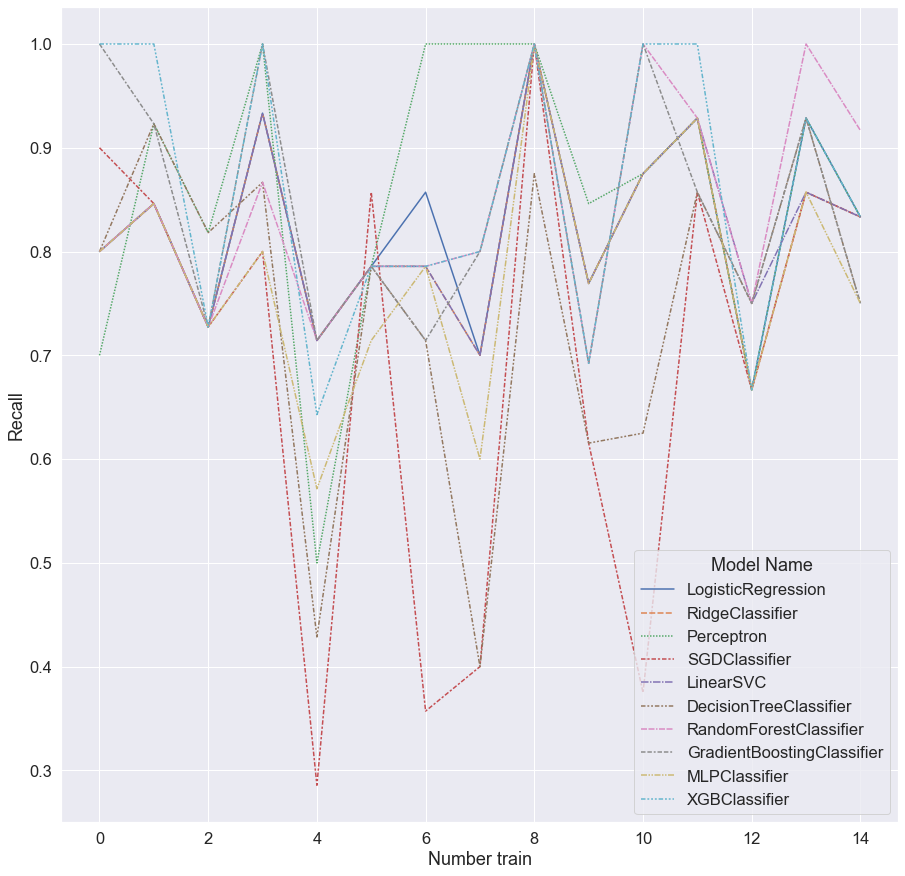

In [233]:
sns.lineplot(data=rec)
plt.legend(labels=name_model, title = 'Model Name')
plt.xlabel('Number train')
plt.ylabel('Recall')

 - Best mean accuracy - XGBClassifier (0.9005)
 - Best mean precision - XGBClassifier (0.8667)
 - Best mean recall - XGBClassifier (0.8575)

In [237]:
model = XGBClassifier()

In [238]:
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

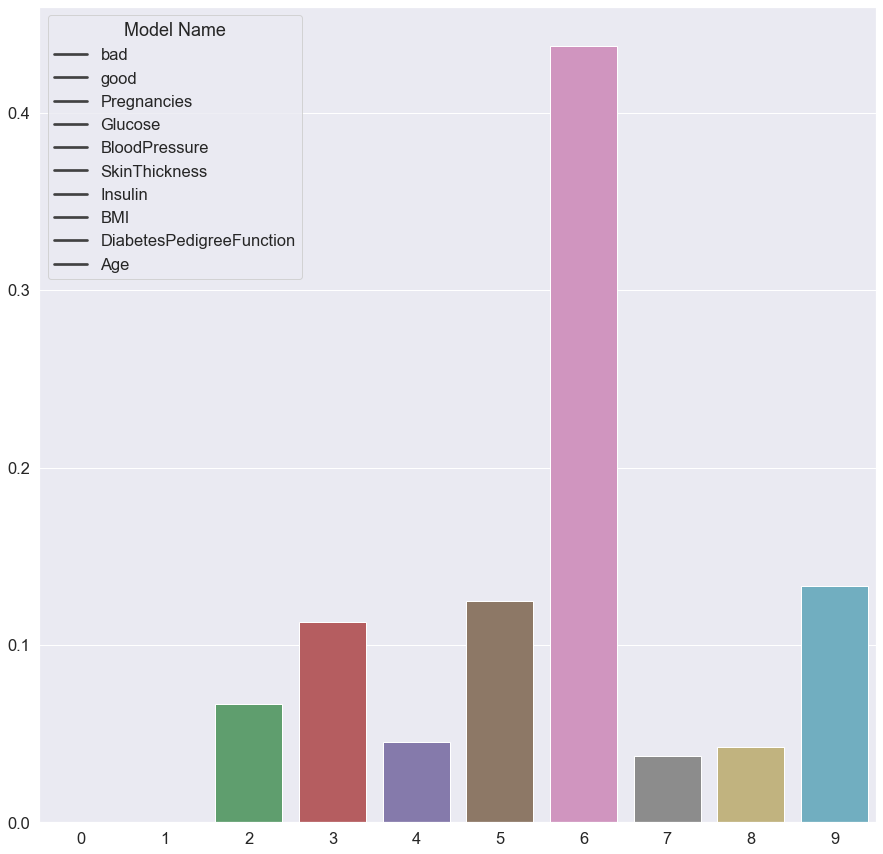

In [272]:
sns.barplot(data=list(model.feature_importances_.reshape(10,1)))
plt.legend(labels=list(df.columns.drop('Outcome')), title = 'Model Name')

The most important parameter to detect diabetes is the amount of insulin in the blood